In [1]:
!gdown --id 1ovYiBl-6XFBI9ooATficyPpY6aaZCYEk

Downloading...
From: https://drive.google.com/uc?id=1ovYiBl-6XFBI9ooATficyPpY6aaZCYEk
To: /content/Dataset 1.csv
100% 999k/999k [00:00<00:00, 66.4MB/s]


In [2]:
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy
import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)


  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=cac3d039330e9f347c4e9be57dd17c7979da5bc9686f9370af46551a9fdef372
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [3]:
df = pd.read_csv('/content/Dataset 1.csv',encoding='unicode_escape')
df.columns

Index(['message', 'label'], dtype='object')

In [4]:
df['label'].value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [5]:
## split dataset based on the class
traning_split_size = 0.8
df_class_1 = df[df['label'] == 1]
df_class_0 = df[df['label'] == 0]

trainSize = int(len(df_class_0) * traning_split_size)
Traning_class_0 = df_class_0[:trainSize]
Test_class_0 = df_class_0[trainSize:]

trainSize = int(len(df_class_1) * traning_split_size)
Traning_class_1 = df_class_1[:trainSize]
Test_class_1 = df_class_1[trainSize:]

In [6]:
li = [Traning_class_0,Traning_class_1]
frame = pd.concat(li, axis=0, ignore_index=True)
frame = shuffle(frame)
frame.reset_index(inplace=True, drop=True)
frame.to_csv('Train-Dataset.csv',index=False)
frame

,message,label
0,@molliemoo now that does not surprise me!!,0
1,@dhlawrencexvii go for it. If it improves qua...,0
2,"@exoticmaya Yeah, go on sexy!",0
3,I'm 90% sure the girls at work don't like me a...,1
4,@stabotage I'm all for sharing.,0
...,...,...
8246,Rise and shine my twitters! Going to feed the ...,0
8247,@joliechose I just sent one!I love when I see ...,0
8248,only has to pass one more assignment before fi...,0
8249,Happy bday mom and Tommy!,0


In [7]:
li = [Test_class_0,Test_class_1]
frame = pd.concat(li, axis=0, ignore_index=True)
frame = shuffle(frame)
frame.reset_index(inplace=True, drop=True)
frame.to_csv('Test-Dataset.csv',index=False)
frame

,message,label
0,2 am suddenly having not good feels ok.bmp bec...,1
1,In dorking looking at houses,0
2,@zamnzaddy66 My depression has depression,1
3,Cats and Dogs FTW (Y) The dogs are soooo cute,0
4,should be asleep. but im listening to the hist,0
...,...,...
2058,Pebbles was afraid of the Thunder and Lightnin...,0
2059,#Ã«Â°ÂÃ«Â´ÂÃ¬Â ÂÃ«Â°ÂÃ«ÂÂ´Ã«Â²ÂÃ«Â Â¤Ã«Â...,1
2060,indo pras festas CLASS OF 2009 I LOVE YOU,0
2061,#Valdoxan 25mg is highly recommended medicine ...,1


In [8]:
import matplotlib.pyplot as plt
import warnings
import time,sys,re,string
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace
try:
  import contractions
except:
  !pip install contractions
import contractions
from torchtext.legacy.data import Field, TabularDataset, BucketIterator
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vectors, GloVe

import nltk
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('averaged_perceptron_tagger')
    nltk.data.find('brown')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
    nltk.download('brown')
    nltk.download('punkt')
from nltk import sent_tokenize,word_tokenize


warnings.filterwarnings('ignore')
torch.manual_seed(0)

     |████████████████████████████████| 284 kB 3.4 MB/s 
     |████████████████████████████████| 321 kB 40.0 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85456 sha256=556df8fef707872ee6053012adcedba11b5cb7e836f4d76dd6a551861758b4db
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
traning_df = pd.read_csv('/content/Train-Dataset.csv')
testing_df = pd.read_csv('/content/Test-Dataset.csv')

In [10]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers. removibng miltiple full stop'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'\.+', ".", text)
    return text

def replace_text(text):
    text = str(text).lower()
    text = text.encode('ascii', 'ignore').decode('utf-8') 
    return text  


for dta in [traning_df,testing_df]:
  dta['text_cleaning'] = dta['message'].apply(lambda x: x.strip().lower() )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x : " ".join(x.split()) )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x: contractions.fix(x) )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x: clean_text(x) )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x: replace_text(x) )
  dta['number_of_word'] = dta.text_cleaning.apply(lambda x: len(word_tokenize(x)) )
  dta['number_of_letter'] = dta.text_cleaning.apply(lambda x: len(x) )
  del dta['message']
  dta['message'] = dta['text_cleaning'] 
  del dta['text_cleaning']



for dta in [traning_df,testing_df]:
  word_count_zero = dta[dta['number_of_word'] == 0]
  dta.drop(word_count_zero.index,inplace=True)
  letter_count_zero = dta[dta['number_of_letter'] == 0]
  dta.drop(letter_count_zero.index,inplace=True)

In [11]:
alltext_length = []
allword_length = []
for val in traning_df['message']:
  word_tok = word_tokenize(val)
  alltext_length.append(len(val))
  allword_length.append(len(word_tok))

print(max(alltext_length))
print(max(allword_length))

289
62


In [12]:
for val in traning_df['message']:
  word_tok = word_tokenize(val)
  if len(word_tok) <= 1:
    print(val)

oneofusisfdup
twittermaniaaaaaaaaaaa
jonathanrknight
depression  
spurofmoment
ferngully
     subway
  thirsty
depression  
katelyniscool   
around
 thanks
incoming
depression  
 whaaatever
reading
realworldmom
houseeee
shopping
quickshooter                
llisalang
fairyfreia          
depression
 thanks
beeeeeeed
lonlonraanch
remysoon
 thanks
radiogrinch 
depression  
 thanks
may    
depression  
makemescream
comeagainjen   
name
shaundiviney
  updates
 yup
 with 
name
picture
party 
depression  
scarych         
 sorite


In [13]:
traning_df.to_csv('/content/Train-Dataset-prcessed.csv',index=False)
testing_df.to_csv('/content/Test-Dataset-prcessed.csv',index=False)

In [14]:
traning_df = pd.read_csv('/content/Train-Dataset-prcessed.csv')
testing_df = pd.read_csv('/content/Test-Dataset-prcessed.csv')

In [15]:
label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(tokenize='spacy', lower=True, include_lengths=True, batch_first=True)
fields = [('polarity', label_field),  ('text', text_field)]


train_data = TabularDataset(path="/content/Train-Dataset-prcessed.csv",
                                 format="csv",
                                  fields=fields,
                                 skip_header=True)

valid_data = TabularDataset(path="/content/Test-Dataset-prcessed.csv",
                                 format="csv",
                                  fields=fields,
                                 skip_header=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_iter = BucketIterator(train_data, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid_data, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)


text_field.build_vocab(train_data,) # min_freq=3,vectors = "glove.6B.100d"
label_field.build_vocab(train_data)

In [16]:
#No. of unique tokens in text
print("Size of TEXT vocabulary:",len(text_field.vocab))

#No. of unique tokens in label
print("Size of LABEL vocabulary:",len(label_field.vocab))

#Commonly used words
print(text_field.vocab.freqs.most_common(10))  

#Word dictionary
print(text_field.vocab.stoi)   

Size of TEXT vocabulary: 64
Size of LABEL vocabulary: 3
[('8', 459), ('6', 446), ('7', 427), ('5', 407), ('9', 407), ('13', 379), ('10', 376), ('11', 369), ('12', 359), ('4', 329)]
defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7fd8ff1a5290>>, {'<unk>': 0, '<pad>': 1, '8': 2, '6': 3, '7': 4, '5': 5, '9': 6, '13': 7, '10': 8, '11': 9, '12': 10, '4': 11, '15': 12, '14': 13, '16': 14, '18': 15, '17': 16, '3': 17, '19': 18, '21': 19, '20': 20, '23': 21, '22': 22, '24': 23, '2': 24, '25': 25, '26': 26, '27': 27, '29': 28, '28': 29, '1': 30, '30': 31, '32': 32, '31': 33, '36': 34, '38': 35, '39': 36, '45': 37, '41': 38, '33': 39, '34': 40, '42': 41, '43': 42, '48': 43, '49': 44, '44': 45, '47': 46, '46': 47, '37': 48, '40': 49, '35': 50, '50': 51, '52': 52, '51': 53, '53': 54, '54': 55, '55': 56, '56': 57, '58': 58, '61': 59, '57': 60, '59': 61, '60': 62, '62': 63})


In [17]:
class CNN(torch.nn.Module): 
    def __init__(self , vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        super(CNN, self).__init__()

        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        #initializing convolution layer
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.conv3 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1)

        #initializing dropout 
        self.dropout = torch.nn.Dropout(0.2)

        #initializing MaxPool2d 
        self.pool= torch.nn.MaxPool2d(2,2)
 
        #initializing linear
        self.fc1 = torch.nn.Linear(64* 1* 1, 512)
        self.fc2 = torch.nn.Linear(512,64)
        self.fc3 = torch.nn.Linear(64,output_dim)

 
    def forward(self, text):
        embedded = self.embedding(text)
        x = embedded.view(-1,1,16,16) 
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(torch.nn.functional.relu(self.conv2(x))) 
        x = self.dropout(x)
        x = self.pool(torch.nn.functional.relu(self.conv3(x))) 
        x = x.view(-1, 64* 1* 1) 
        # x = self.pool(torch.nn.functional.relu(x)) 
        # x = x.view(-1, 32* 1* 1) 
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [18]:
# Hyperparameters
num_epochs = 100
learning_rate = 0.0001

INPUT_DIM = len(text_field.vocab)
EMBEDDING_DIM = 256
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.2
PAD_IDX = text_field.vocab.stoi[text_field.pad_token] # padding

In [19]:
!pip install torchinfo

In [20]:
model = CNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX).to(device)

from torchinfo import summary
summary( model, input_size=(1, 10),dtypes=[torch.long],)

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      --                        --
├─Embedding: 1-1                         [1, 10, 256]              16,384
├─Conv2d: 1-2                            [10, 16, 14, 14]          160
├─MaxPool2d: 1-3                         [10, 16, 7, 7]            --
├─Dropout: 1-4                           [10, 16, 7, 7]            --
├─Conv2d: 1-5                            [10, 32, 5, 5]            4,640
├─MaxPool2d: 1-6                         [10, 32, 2, 2]            --
├─Dropout: 1-7                           [10, 32, 2, 2]            --
├─Conv2d: 1-8                            [10, 64, 2, 2]            2,112
├─MaxPool2d: 1-9                         [10, 64, 1, 1]            --
├─Linear: 1-10                           [10, 512]                 33,280
├─Linear: 1-11                           [10, 64]                  32,832
├─Linear: 1-12                           [10, 1]                  

In [21]:
model.to(device)

# Loss and optimizer
criterion = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
def binary_accuracy(preds, y):

    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() 
    acc = correct.sum() / len(correct)
    return acc

In [23]:
# training function 
def train(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for i,batch in enumerate( iterator,1):
        text, text_lengths = batch.text
        
        optimizer.zero_grad()
        predictions = model(text).squeeze(1)
        
        loss = criterion(predictions, batch.polarity)
        acc = binary_accuracy(predictions, batch.polarity)

        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

        print_val = f"running_loss : {(loss.item()):.6f}\t"
        print_val += f"running_corrects : {acc.item():.6f}\t"  
        sys.stdout.write('\r' + str(print_val))
        

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [24]:
def evaluate(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch.text
            predictions = model(text,).squeeze(1)
            loss = criterion(predictions, batch.polarity)
            acc = binary_accuracy(predictions, batch.polarity)
            
            epoch_acc += acc.item()
            epoch_loss += loss.item()
        
    return  epoch_loss / len(iterator), epoch_acc / len(iterator) 

In [25]:
t = time.time()
loss=[]
acc=[]
val_acc=[]
val_loss=[]

for epoch in range(num_epochs):
    
    train_loss, train_acc = train(model, train_iter)
    valid_loss, valid_acc = evaluate(model, valid_iter)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%  | Val. Acc: {valid_acc*100:.2f}%')
    # print(f'\t')
    
    loss.append(train_loss)
    acc.append(train_acc)
    val_loss.append(valid_loss)
    val_acc.append(valid_acc)
    
print(f'time:{time.time()-t:.3f}')

running_loss : 0.631195	running_corrects : 0.700000		Train Loss: 0.553 | Train Acc: 76.77%  | Val. Acc: 77.38%
running_loss : 0.625504	running_corrects : 0.700000		Train Loss: 0.533 | Train Acc: 77.58%  | Val. Acc: 77.38%
running_loss : 0.619737	running_corrects : 0.700000		Train Loss: 0.532 | Train Acc: 77.58%  | Val. Acc: 77.38%
running_loss : 0.623295	running_corrects : 0.700000		Train Loss: 0.530 | Train Acc: 77.58%  | Val. Acc: 77.38%
running_loss : 0.624527	running_corrects : 0.700000		Train Loss: 0.530 | Train Acc: 77.58%  | Val. Acc: 77.38%
running_loss : 0.621919	running_corrects : 0.700000		Train Loss: 0.529 | Train Acc: 77.58%  | Val. Acc: 77.38%
running_loss : 0.621275	running_corrects : 0.700000		Train Loss: 0.526 | Train Acc: 77.58%  | Val. Acc: 77.38%
running_loss : 0.627945	running_corrects : 0.700000		Train Loss: 0.525 | Train Acc: 77.58%  | Val. Acc: 77.38%
running_loss : 0.632148	running_corrects : 0.700000		Train Loss: 0.521 | Train Acc: 77.58%  | Val. Acc: 77.38%
r

In [26]:
import glob,sys,os
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sn
import pandas as pd
import pathlib
import zipfile
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

In [27]:
_tranning_loss = loss
_tranning_acc = acc
_validation_loss = val_loss
_validation_acc = val_acc

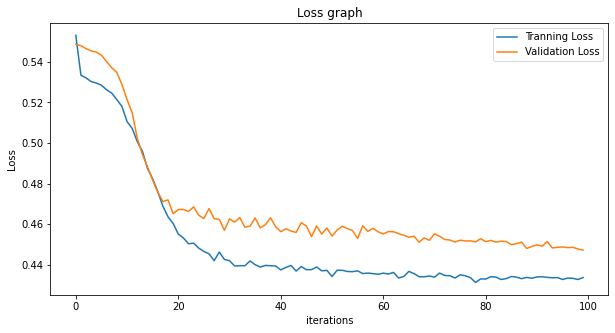

In [28]:
plt.figure(figsize=(10,5))
plt.title("Loss graph")
plt.plot(_tranning_loss,label="Tranning Loss")
plt.plot(_validation_loss,label="Validation Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

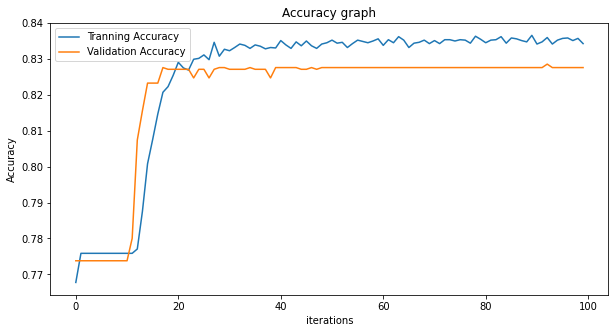

In [29]:
plt.figure(figsize=(10,5))
plt.title("Accuracy graph")
plt.plot(_tranning_acc,label="Tranning Accuracy")
plt.plot(_validation_acc,label="Validation Accuracy")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [30]:
y_true_tensor = torch.tensor([])
y_pred_tensor = torch.tensor([])
model.eval()
with torch.no_grad():
      for batch in valid_iter:
          text, text_lengths = batch.text
          predictions = model(text).squeeze(1)

          rounded_preds = torch.round(torch.sigmoid(predictions))
          correct = (rounded_preds == batch.polarity).float() 

          # print(rounded_preds,batch.polarity)

          y_true_tensor = torch.cat((y_true_tensor,batch.polarity))
          y_pred_tensor = torch.cat((y_pred_tensor,rounded_preds))
          # acc = binary_accuracy(predictions, batch.polarity)
          # print(acc)

In [31]:
y_true = y_true_tensor.type(torch.LongTensor).tolist()
y_pred = y_pred_tensor.type(torch.LongTensor).tolist()

In [32]:
matrice = confusion_matrix(y_true,y_pred)
matrice

array([[1584,   14],
       [ 335,  126]])

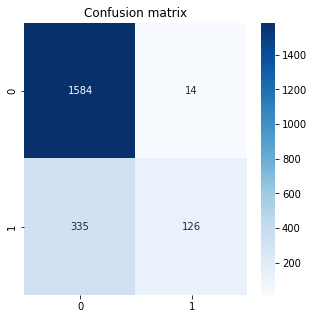

In [33]:
df_cm = pd.DataFrame(matrice,columns=[0,1],index=[0,1])
plt.figure(figsize=(5,5))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.show()

In [34]:
classify_report = classification_report(y_true, y_pred, )
print(classify_report)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1598
           1       0.90      0.27      0.42       461

    accuracy                           0.83      2059
   macro avg       0.86      0.63      0.66      2059
weighted avg       0.84      0.83      0.79      2059

